In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from data_processing.cgm_data import CGMData, DATA_PATH
from data_processing.cgm_data_helper import get_meal_spike, find_standard_meal, plot_series_with_food

In [2]:
data = CGMData()
print(data[1].gender)
print(data[1].hba1c)

FEMALE
5.5


## Exmaple Glucose vs Food Consumption
The last day charts show the period with no food consumption followed by Boost

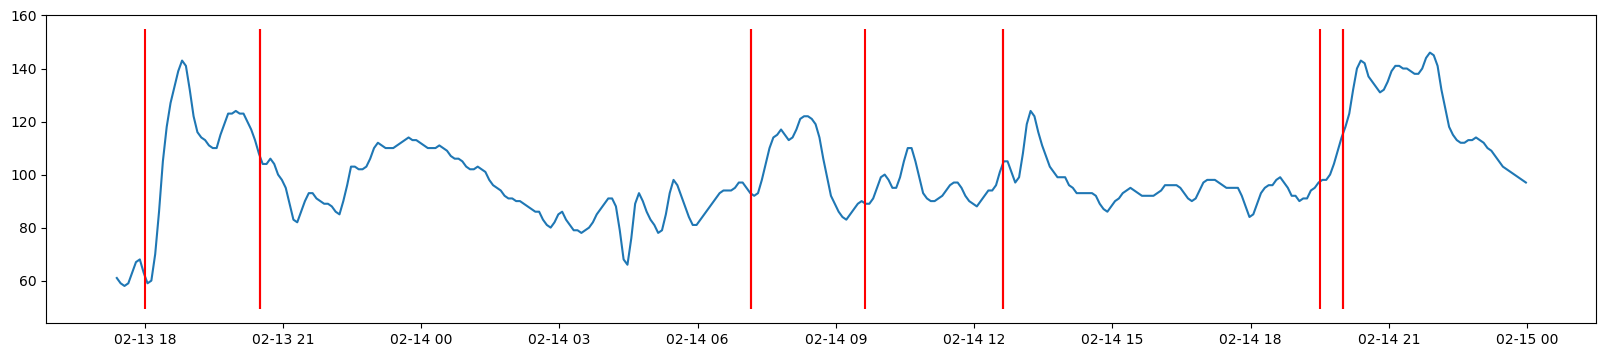

In [4]:
plot_series_with_food(data[1].glu, data[1].food, '2020-02-13', '2020-02-14')

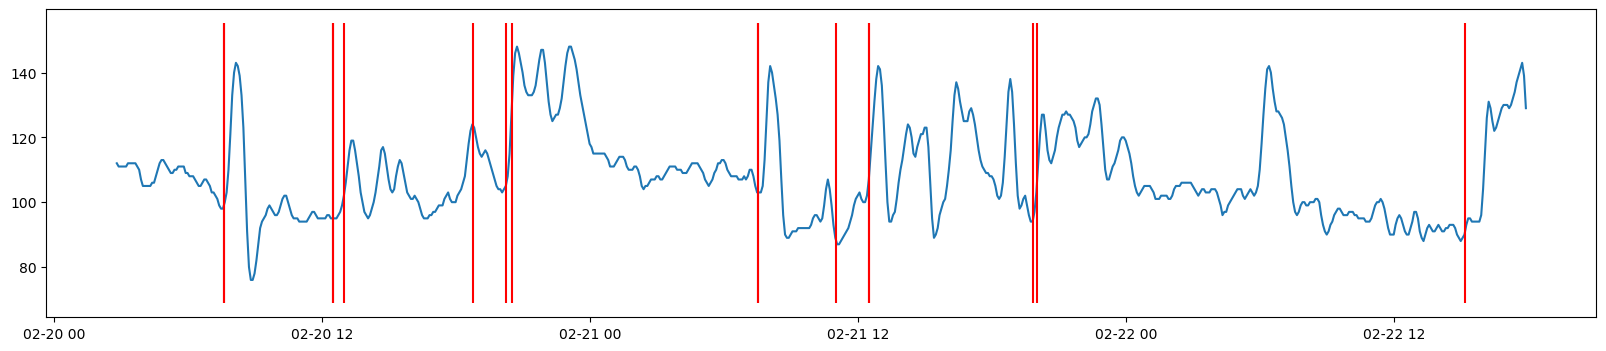

In [5]:
plot_series_with_food(data[1].glu, data[1].food, '2020-02-20', '2020-02-22')

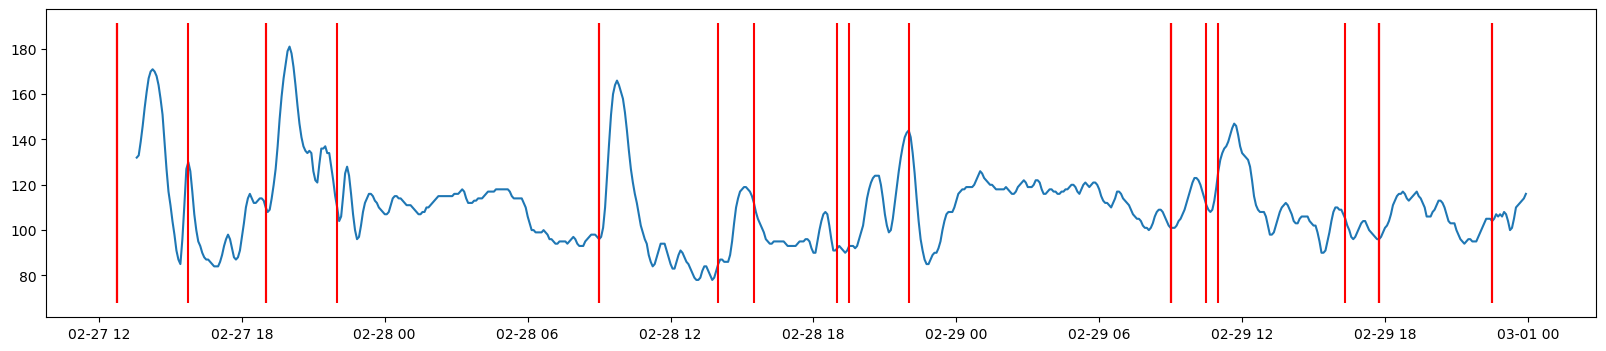

In [6]:
plot_series_with_food(data[5].glu, data[5].food, '2020-02-27', '2020-02-29')

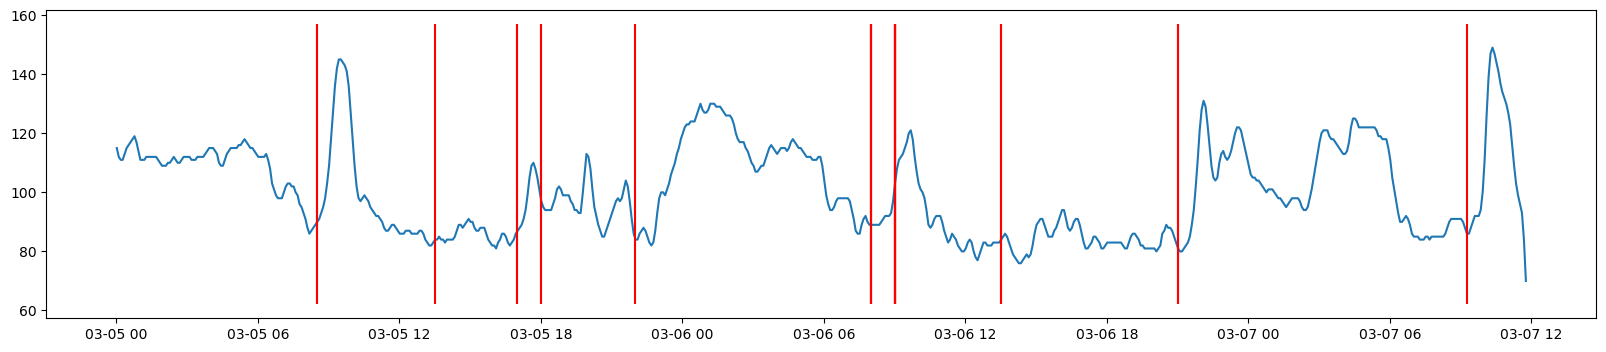

In [7]:
plot_series_with_food(data[5].glu, data[5].food, '2020-03-05', '2020-03-07')

In [11]:
data[6].food['searched_food']

time_begin
2020-02-28 08:10:00     
2020-02-28 09:15:00     
2020-02-28 11:25:00     
2020-02-28 15:30:00     
2020-02-28 19:30:00     
                      ..
2020-03-08 12:30:00     
2020-03-08 12:30:00     
2020-03-08 19:50:00     
2020-03-08 19:50:00     
2020-03-09 07:30:00     
Name: searched_food, Length: 73, dtype: object

In [12]:
# Verifying all datasets load properly
for i in range(2, 3):
  for data_str in ['acc', 'bvp', 'glu', 'eda', 'food', 'hr', 'ibi', 'temp']:
    print(i, data_str)
    try:
      print(data[i].__getattribute__(data_str).head(5))
    except Exception as e:
      print(f"Error on patient {i} with {data_str}: {e}")

2 acc
                               acc_x     acc_y     acc_z
datetime                                                
2020-02-21 09:19:06.000000 -1.544882 -5.407087  8.033386
2020-02-21 09:19:06.031250 -1.544882 -5.407087  7.878898
2020-02-21 09:19:06.062500 -1.544882 -5.407087  7.878898
2020-02-21 09:19:06.093750 -1.544882 -5.407087  7.878898
2020-02-21 09:19:06.125000 -1.544882 -5.407087  7.878898
2 bvp
                            bvp
datetime                       
2020-02-21 09:19:06.000000 -0.0
2020-02-21 09:19:06.015625 -0.0
2020-02-21 09:19:06.031250 -0.0
2020-02-21 09:19:06.046875 -0.0
2020-02-21 09:19:06.062500 -0.0
2 glu
                     glucose
datetime                    
2020-02-21 11:08:36    186.0
2020-02-21 11:13:36    181.0
2020-02-21 11:18:36    175.0
2020-02-21 11:23:35    168.0
2020-02-21 11:28:36    163.0
2 eda
                              eda
datetime                         
2020-02-21 09:19:06.000  0.000000
2020-02-21 09:19:06.250  0.139648
2020-02-21 09:

## Look at post meal glucose response ofr single patient

In [14]:
slices = []
for start in food.index:
  slices.append(get_meal_spike(data[1].glu, start, 3))

In [15]:
# TODO Only include spike with a single food item and not consumed iwthin 3 hours of other food items

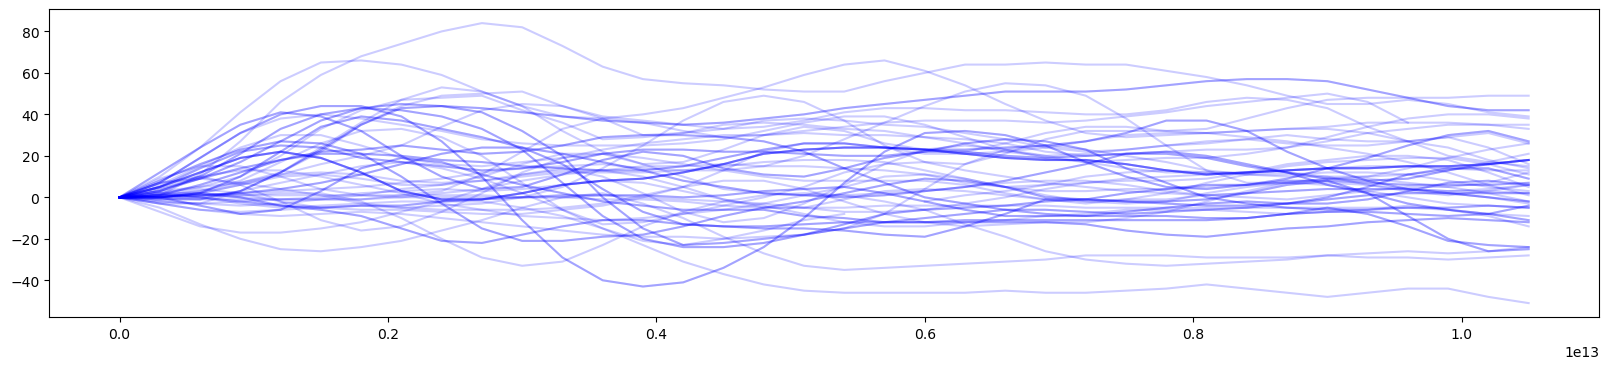

In [16]:
# Meals from patient 1, start aligned
df = pd.concat(slices, axis=1)
df.columns = list(range(df.shape[1]))

plt.figure(figsize=(20, 4))
for col in range(df.shape[1]):
  plt.plot(df[col] - df.iloc[0, col], color='blue', alpha=0.2)

In [18]:
find_standard_meal(data[3].food)

logged_food  amount   unit  \
time_begin                                       
2020-02-23 05:30:00        Milk     4.0  ounce   
2020-02-23 05:30:00  Cornflakes     1.5    cup   
2020-02-25 06:50:00        Milk     4.0  ounce   
2020-02-25 06:50:00  Cornflakes     1.5    cup   
2020-02-27 05:30:00        Milk     4.0  ounce   
2020-02-27 05:30:00  Cornflakes     1.5    cup   
2020-02-29 08:15:00        Milk     4.0  ounce   
2020-02-29 08:15:00  Cornflakes     1.5    cup   

                                                    searched_food  calorie  \
time_begin                                                                   
2020-02-23 05:30:00  (Natrel) Lactose Free 2% Partly Skimmed Milk     60.0   
2020-02-23 05:30:00                    (Kellogg's) Frosted Flakes    220.0   
2020-02-25 06:50:00  (Natrel) Lactose Free 2% Partly Skimmed Milk     60.0   
2020-02-25 06:50:00                    (Kellogg's) Frosted Flakes    220.0   
2020-02-27 05:30:00  (Natrel) Lactose Free 2% Partly Skimmed Milk     60.0   
2020-02-27 05:30:00                    (Kellogg's) Frosted Flakes    220.0   
2020-02-29 08:15:00  (Natrel) Lactose Free 2% Partly Skimmed Milk     60.0   
2020-02-29 08:15:00                    (Kellogg's) Frosted Flakes    220.0   

                     total_carb  sugar  protein time_end  
time_begin                                                
2020-02-23 05:30:00         4.5    4.0      6.0      NaT  
2020-02-23 05:30:00        52.0   20.0      2.0      NaT  
2020-02-25 06:50:00         4.5    4.0      6.0      NaT  
2020-02-25 06:50:00        52.0   20.0      2.0      NaT  
2020-02-27 05:30:00         4.5    4.0      6.0      NaT  
2020-02-27 05:30:00        52.0   20.0      2.0      NaT  
2020-02-29 08:15:00         4.5    4.0      6.0      NaT  
2020-02-29 08:15:00        52.0   20.0      2.0      NaT

In [19]:
data[3].food[data[3].food['searched_food'].str.contains('Partly Skimmed Milk') | data[3].food['searched_food'].str.contains('Frosted Flakes')]

logged_food  amount   unit  \
time_begin                                       
2020-02-23 05:30:00        Milk     4.0  ounce   
2020-02-23 05:30:00  Cornflakes     1.5    cup   
2020-02-25 06:50:00        Milk     4.0  ounce   
2020-02-25 06:50:00  Cornflakes     1.5    cup   
2020-02-27 05:30:00        Milk     4.0  ounce   
2020-02-27 05:30:00  Cornflakes     1.5    cup   
2020-02-29 08:15:00        Milk     4.0  ounce   
2020-02-29 08:15:00  Cornflakes     1.5    cup   

                                                    searched_food  calorie  \
time_begin                                                                   
2020-02-23 05:30:00  (Natrel) Lactose Free 2% Partly Skimmed Milk     60.0   
2020-02-23 05:30:00                    (Kellogg's) Frosted Flakes    220.0   
2020-02-25 06:50:00  (Natrel) Lactose Free 2% Partly Skimmed Milk     60.0   
2020-02-25 06:50:00                    (Kellogg's) Frosted Flakes    220.0   
2020-02-27 05:30:00  (Natrel) Lactose Free 2% Partly Skimmed Milk     60.0   
2020-02-27 05:30:00                    (Kellogg's) Frosted Flakes    220.0   
2020-02-29 08:15:00  (Natrel) Lactose Free 2% Partly Skimmed Milk     60.0   
2020-02-29 08:15:00                    (Kellogg's) Frosted Flakes    220.0   

                     total_carb  sugar  protein time_end  
time_begin                                                
2020-02-23 05:30:00         4.5    4.0      6.0      NaT  
2020-02-23 05:30:00        52.0   20.0      2.0      NaT  
2020-02-25 06:50:00         4.5    4.0      6.0      NaT  
2020-02-25 06:50:00        52.0   20.0      2.0      NaT  
2020-02-27 05:30:00         4.5    4.0      6.0      NaT  
2020-02-27 05:30:00        52.0   20.0      2.0      NaT  
2020-02-29 08:15:00         4.5    4.0      6.0      NaT  
2020-02-29 08:15:00        52.0   20.0      2.0      NaT

In [20]:
data[2].food.head()

time_end                   logged_food  amount  \
time_begin                                                           
2020-02-21 10:09:00      NaT                   Mello Yello    12.0   
2020-02-21 10:11:00      NaT  (Jimmy Dean) Chicken Biscuit     1.0   
2020-02-21 12:09:00      NaT                    Beef Jerky     2.0   
2020-02-21 12:12:00      NaT       (Gatorade) Fierce Grape    12.0   
2020-02-21 14:02:00      NaT       Banquet Chicken Pot Pie   198.0   

                            unit  \
time_begin                         
2020-02-21 10:09:00  fluid ounce   
2020-02-21 10:11:00          NaN   
2020-02-21 12:09:00          NaN   
2020-02-21 12:12:00  fluid ounce   
2020-02-21 14:02:00         gram   

                                                         searched_food  \
time_begin                                                               
2020-02-21 10:09:00                                        Mello Yello   
2020-02-21 10:11:00  (Jimmy Dean) Sandwiches, Biscuit Southern Styl...   
2020-02-21 12:09:00                                   Large Beef Jerky   
2020-02-21 12:12:00                              Gatorade Fierce Grape   
2020-02-21 14:02:00                            Banquet Chicken Pot Pie   

                     calorie  total_carb  dietary_fiber  sugar  protein  \
time_begin                                                                
2020-02-21 10:09:00    180.0        48.0            0.0   48.0      0.0   
2020-02-21 10:11:00    280.0        32.0            2.0    3.0     13.0   
2020-02-21 12:09:00    164.0         4.4            0.7    3.6     13.0   
2020-02-21 12:12:00     84.0        21.6            NaN   20.4      0.0   
2020-02-21 14:02:00    700.0        66.0            NaN    4.0     24.0   

                     total_fat  
time_begin                      
2020-02-21 10:09:00        0.0  
2020-02-21 10:11:00       12.0  
2020-02-21 12:09:00       10.0  
2020-02-21 12:12:00        NaN  
2020-02-21 14:02:00        NaN

In [21]:
# Collect standard breakfasts
std_curves = []
for i in range(1, 14):
  std_meal = find_standard_meal(data[i].food)
  if std_meal.empty:
    continue

  meal_times = std_meal.index.unique()
  for time in meal_times:
    std_curves.append(get_meal_spike(data[i].glu, time, 3))
std_curves = pd.concat(std_curves, axis=1)
std_curves.columns = list(range(std_curves.shape[1]))

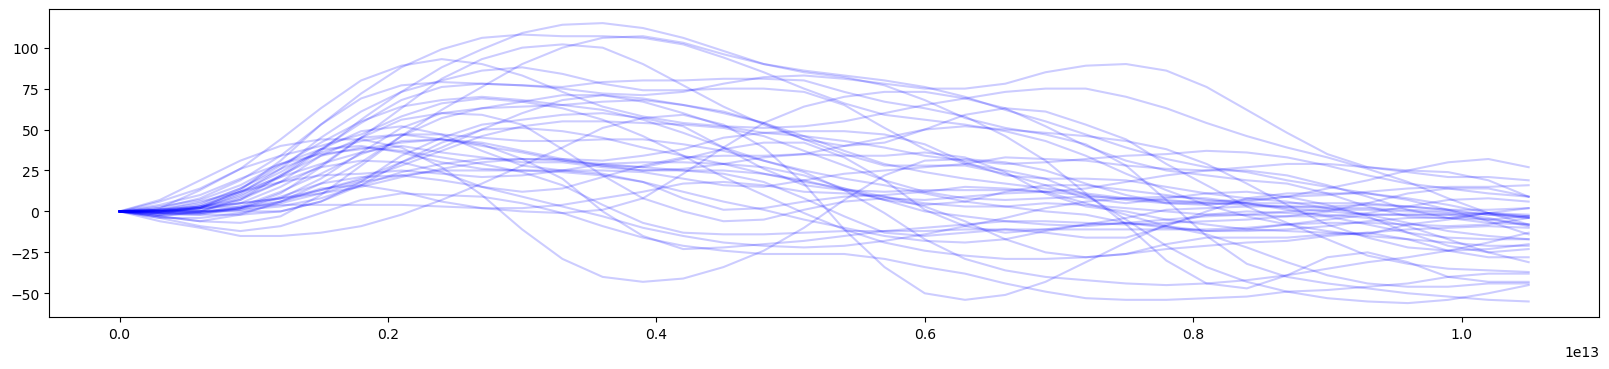

In [22]:
# Standard breakfast responses, start aligned
plt.figure(figsize=(20, 4))
for col in range(std_curves.shape[1]):
  plt.plot(std_curves[col] - std_curves.iloc[0, col], color='blue', alpha=0.2)

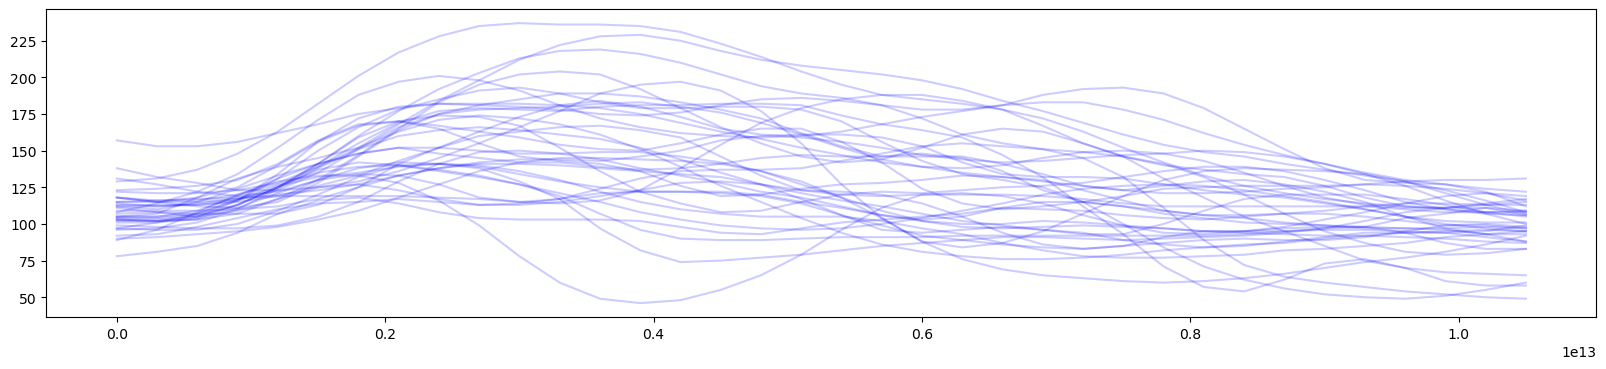

In [23]:
# Standard breakfast responses
plt.figure(figsize=(20, 4))
for col in range(std_curves.shape[1]):
  plt.plot(std_curves[col], color='blue', alpha=0.2)

## Possible compression lows in patient 1 when the the redd acc line is higher
According to the empatica E4 documentation the z-axis (**red** line), is upwards from the "watch face". If the patient is lying on their back, then we would expect a strong negative z-axis signal if their wrist is flat or a strong x-axis (likely **orange**) signal if their wrist is rotated. y-axis (likely **green**) signal should be minimal.
If the patient is lying on their stomach, the we should expect a strong, positive z-axis signal,

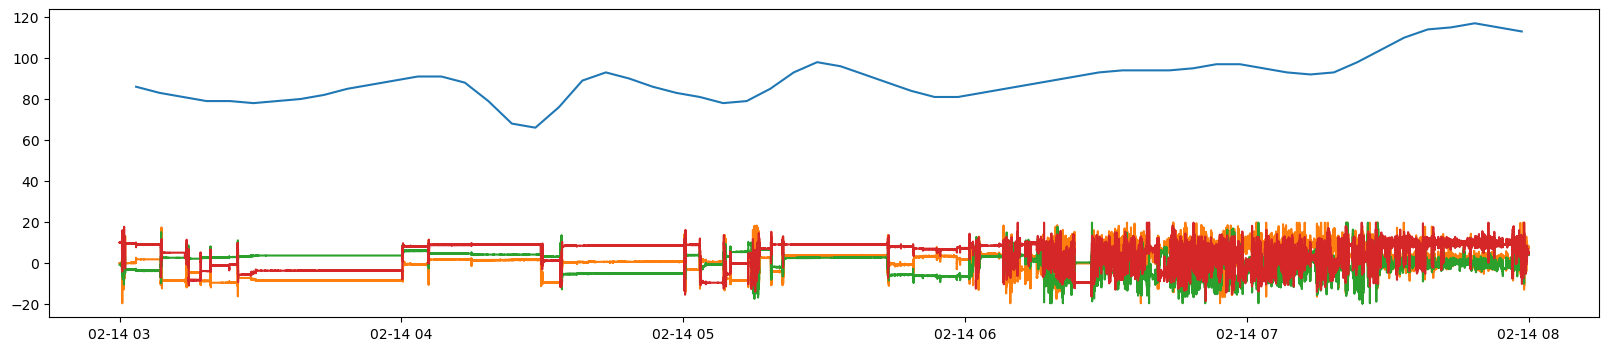

In [24]:
plt.figure(figsize=(20, 4))
plt.plot(data[1].glu[(data[1].glu.index < '2020-02-14 08:00:00') & (data[1].glu.index > '2020-02-14 03:00:00')])
plt.plot(data[1].acc[(data[1].acc.index < '2020-02-14 08:00:00') & (data[1].acc.index > '2020-02-14 03:00:00')])

In [25]:
# Here x and z are negative, potentially indicating the right wrist is rotated slightly counterclockwise, while the patient lying on their back
data[1].acc[(data[1].acc.index < '2020-02-14 03:55:00') & (data[1].acc.index > '2020-02-14 03:54:00')].head()

acc_x     acc_y     acc_z
datetime                                                
2020-02-14 03:54:00.031250 -8.496850  3.553228 -3.862205
2020-02-14 03:54:00.062500 -8.651339  3.553228 -3.862205
2020-02-14 03:54:00.093750 -8.496850  3.553228 -3.862205
2020-02-14 03:54:00.125000 -8.496850  3.553228 -3.862205
2020-02-14 03:54:00.156250 -8.651339  3.553228 -3.862205

In [26]:
# z is positive, potentially showing the patient lying on their stomach
# Not sure what is causing y to be negative, arm is likely at an odd angle, wrist parallel to ground
data[1].acc[(data[1].acc.index < '2020-02-14 04:40:00') & (data[1].acc.index > '2020-02-14 04:39:00')].head()

acc_x     acc_y     acc_z
datetime                                                
2020-02-14 04:39:00.031250  0.308976 -5.252598  8.342362
2020-02-14 04:39:00.062500  0.308976 -5.252598  8.342362
2020-02-14 04:39:00.093750  0.308976 -5.252598  8.342362
2020-02-14 04:39:00.125000  0.308976 -5.252598  8.342362
2020-02-14 04:39:00.156250  0.308976 -5.252598  8.342362

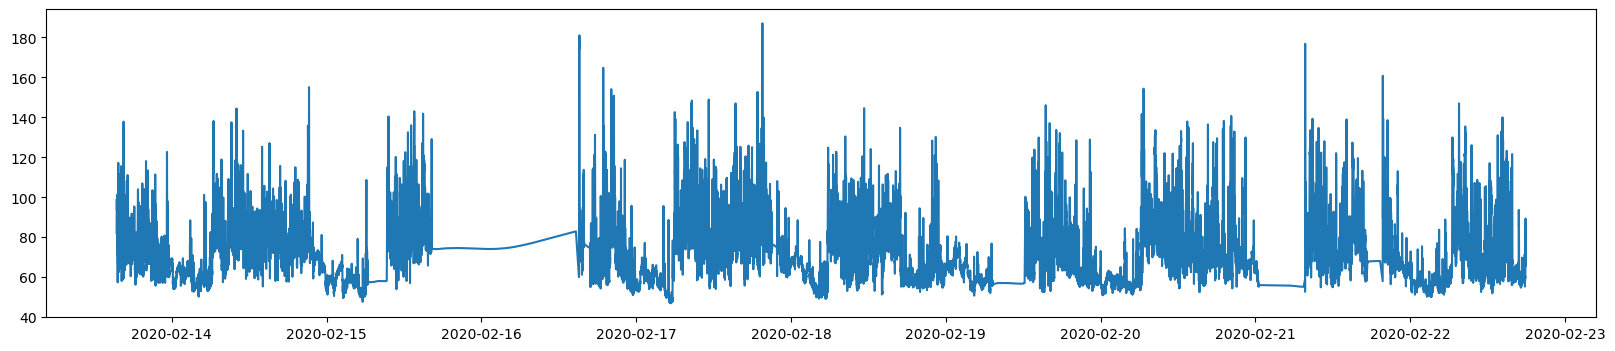

In [27]:
plt.figure(figsize=(20, 4))
plt.plot(data[1].hr)

## Glucose curve processing

In [28]:
# In order of importance
# TODO : Peak value
# TODO: Time to peak
# TODO: Time to start of rise
# TODO: Width of peak (hard to define, make time until body returns to blood sugar before meal)

## Simple time series fit to glu curve on patient 1

In [29]:
# Baseline mean model
data[1].glu.mean()

glucose    106.093713
dtype: float64

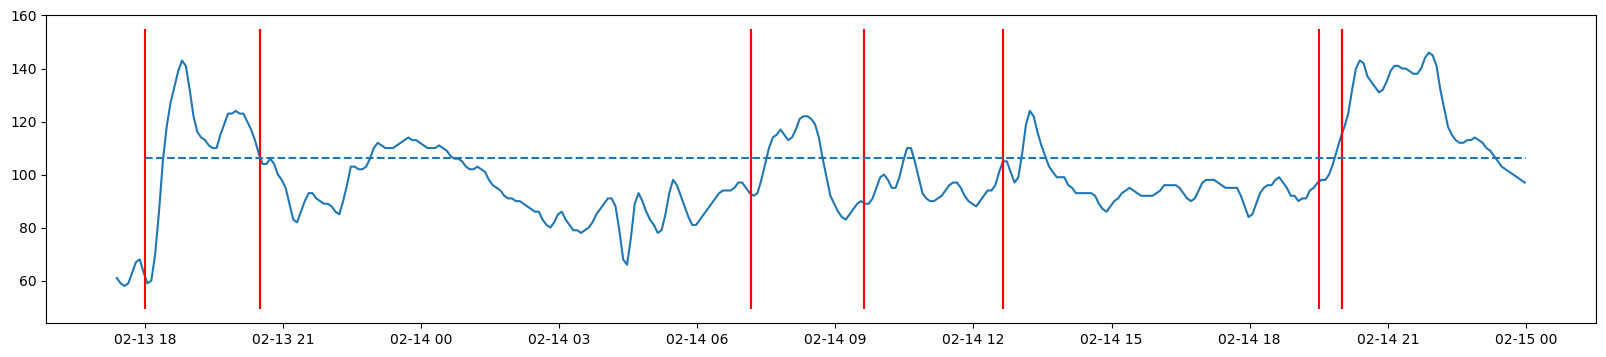

In [8]:
plot_series_with_food(data[1].glu, data[1].food, '2020-02-13', '2020-02-14')
plt.hlines(data[1].glu.mean(), pd.to_datetime('2020-02-13 18:00:00'), pd.to_datetime('2020-02-15'), linestyles='dashed')

In [31]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.tsa as sm

data[1].glu

glucose
datetime                    
2020-02-13 17:23:32     61.0
2020-02-13 17:28:32     59.0
2020-02-13 17:33:32     58.0
2020-02-13 17:38:32     59.0
2020-02-13 17:43:31     63.0
...                      ...
2020-02-22 17:33:23    139.0
2020-02-22 17:38:23    141.0
2020-02-22 17:43:23    143.0
2020-02-22 17:48:22    139.0
2020-02-22 17:53:23    129.0

[2561 rows x 1 columns]

In [32]:
glu_train = data[1].glu.loc['2020-02-13 00:00:00':'2020-02-18 00:00:00']
glu_test = data[1].glu.loc['2020-02-18 00:00:00':'2020-02-22 18:00:00']

In [33]:
tss = TimeSeriesSplit(n_splits=10)

for train_index, test_index in tss.split(glu_train):
  g_tt = glu_train.iloc[train_index]
  g_ho = glu_train.iloc[test_index]




In [36]:
auto_arima(glu_train, seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4676.873, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6539.411, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5292.935, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5598.886, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6537.806, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4711.554, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4796.985, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4672.000, Time=0.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4739.342, Time=0.31 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=4668.971, Time=1.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4716.381, Time=0.34 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=4643.165, Time=0.84 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=4648.903, Time=0.60 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=4633.928, Time=0.80 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept

ARIMA(order=(5, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [37]:
arima = ARIMA(glu_train.values, order=(1, 0, 0)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1231
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3266.400
Date:                Tue, 28 May 2024   AIC                           6538.799
Time:                        15:22:09   BIC                           6554.146
Sample:                             0   HQIC                          6544.573
                               - 1231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9722      3.836     26.065      0.000      92.455     107.490
ar.L1          0.9779      0.005    205.219      0.000       0.969       0.987
sigma2        11.7812      0.246     47.850      0.000      11.299      12.264
===================================================================================
Ljung-Box (L1) (Q):                 785.73   Jarque-Bera (JB):              1553.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

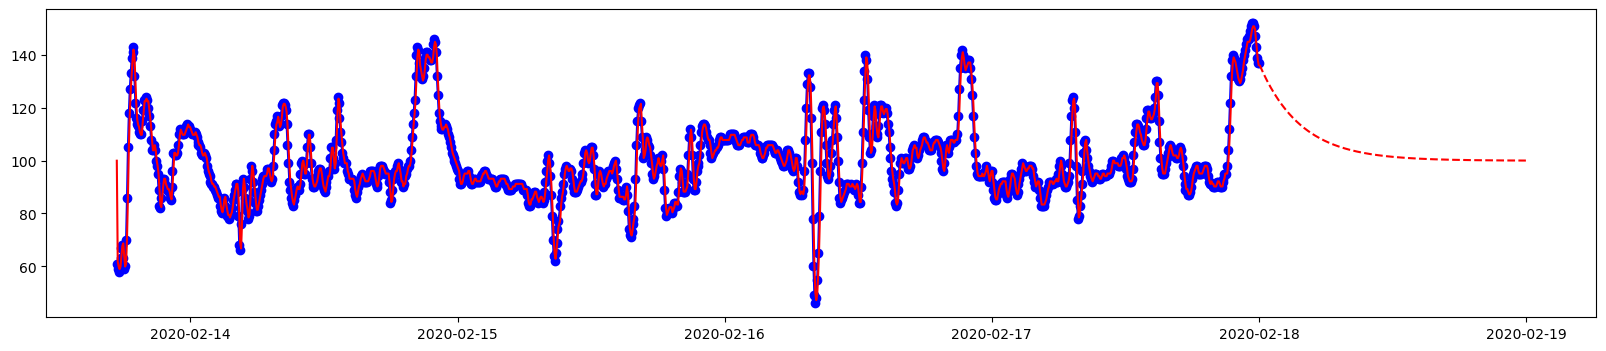

In [38]:
plt.figure(figsize=(20, 4))
plt.plot(glu_train, 'b-o')
plt.plot(glu_train.index, arima.fittedvalues, 'r-')
plt.plot(glu_test.index[:288], arima.forecast(288), 'r--')

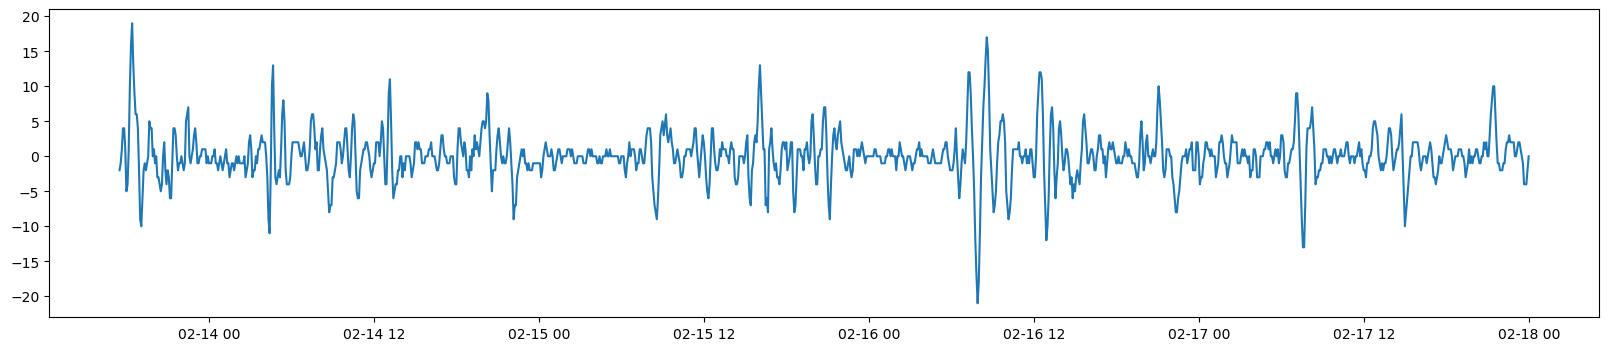

In [39]:
plt.figure(figsize=(20, 4))
plt.plot(glu_train.diff())

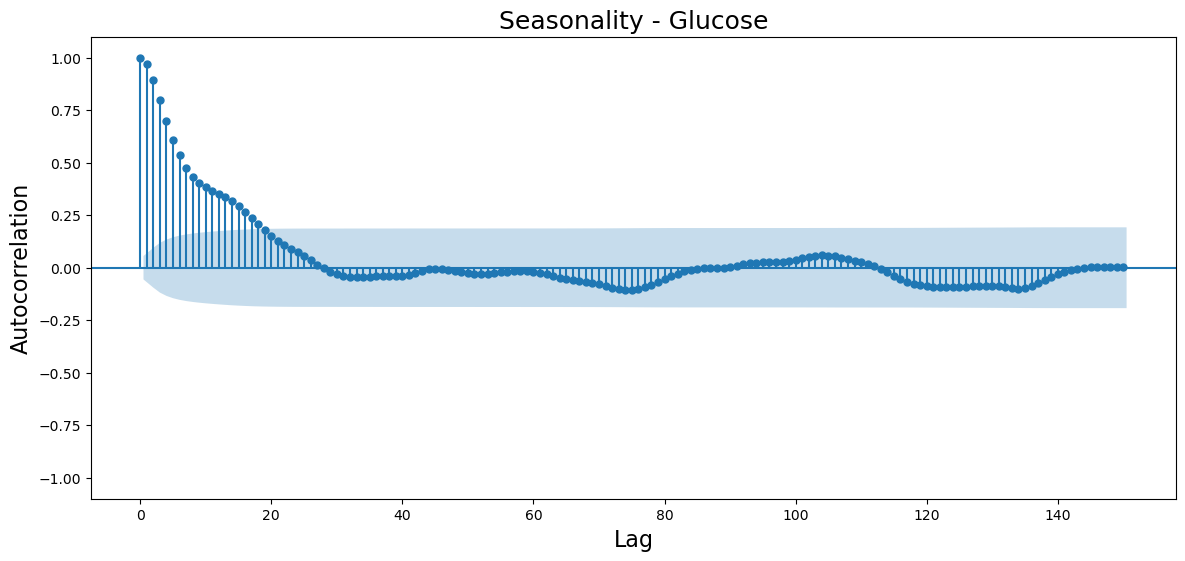

In [40]:
# This is showing seasonality
fig, ax = plt.subplots(1, 1, figsize=(14,6))
sm.api.graphics.plot_acf(glu_train.values, lags=150, ax=ax)
plt.title('Seasonality - Glucose', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

In [41]:
glu_train.diff()[1:]

glucose
datetime                    
2020-02-13 17:28:32     -2.0
2020-02-13 17:33:32     -1.0
2020-02-13 17:38:32      1.0
2020-02-13 17:43:31      4.0
2020-02-13 17:48:31      4.0
...                      ...
2020-02-17 23:38:28     -4.0
2020-02-17 23:43:27     -4.0
2020-02-17 23:48:28     -4.0
2020-02-17 23:53:27     -2.0
2020-02-17 23:58:28      0.0

[1230 rows x 1 columns]

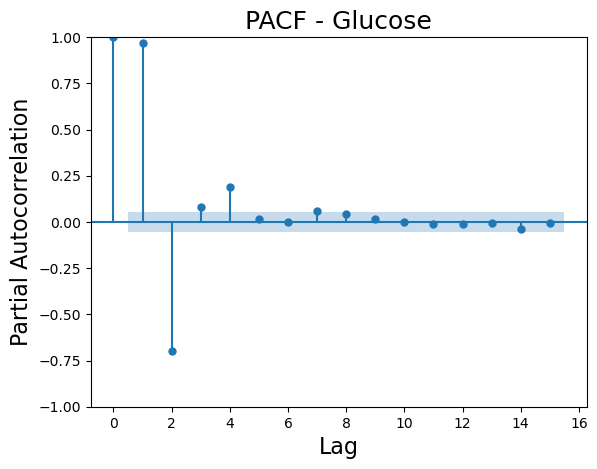

In [42]:
sm.api.graphics.plot_pacf(glu_train.values, lags=15)
plt.title('PACF - Glucose', fontsize=18)
plt.ylabel("Partial Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)
plt.show()


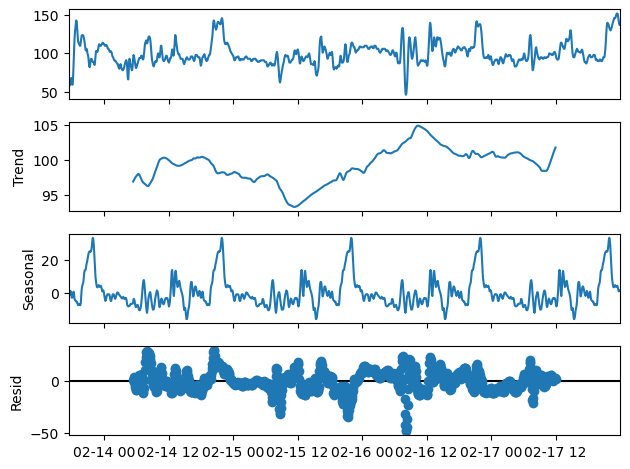

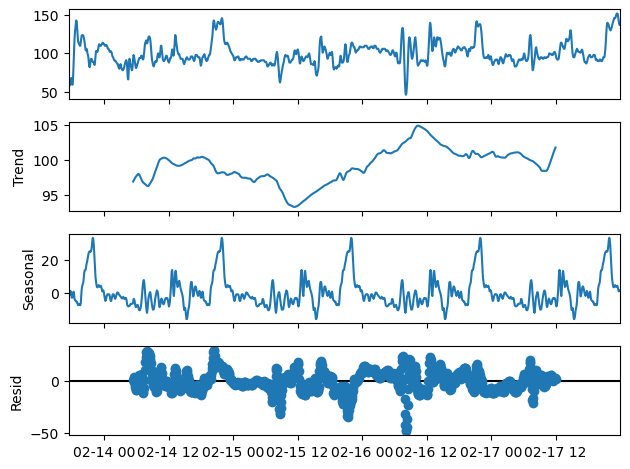

In [43]:
# Seasonal Decomposition
sm.seasonal.seasonal_decompose(glu_train, model='additive', period=288).plot()

## Simplified classification and regression models

In [ ]:
# Max blood glucose 2 hours after a meal